In [15]:
import numpy as np
import matplotlib.pyplot as plt
import math

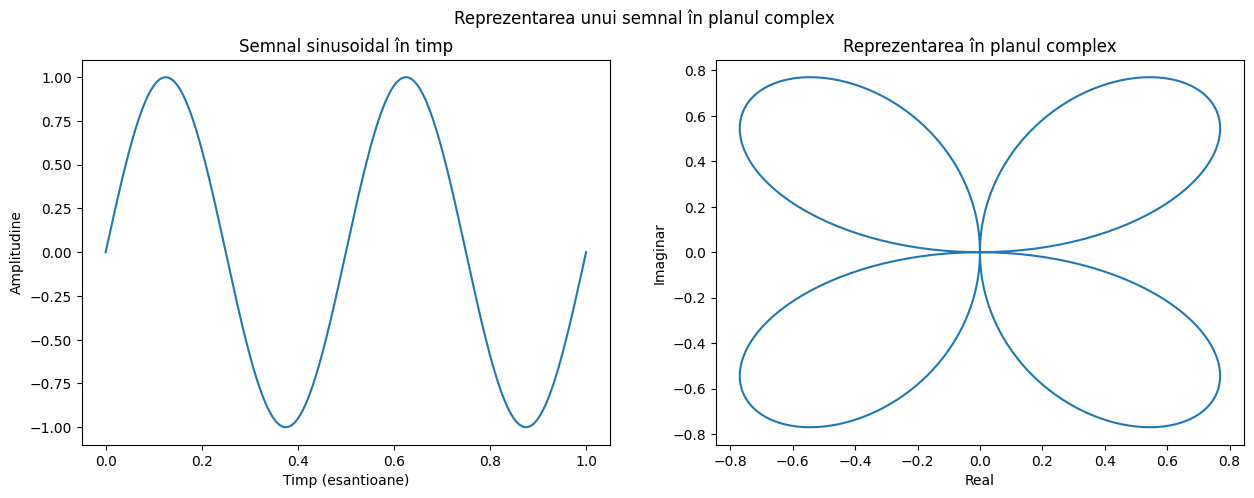

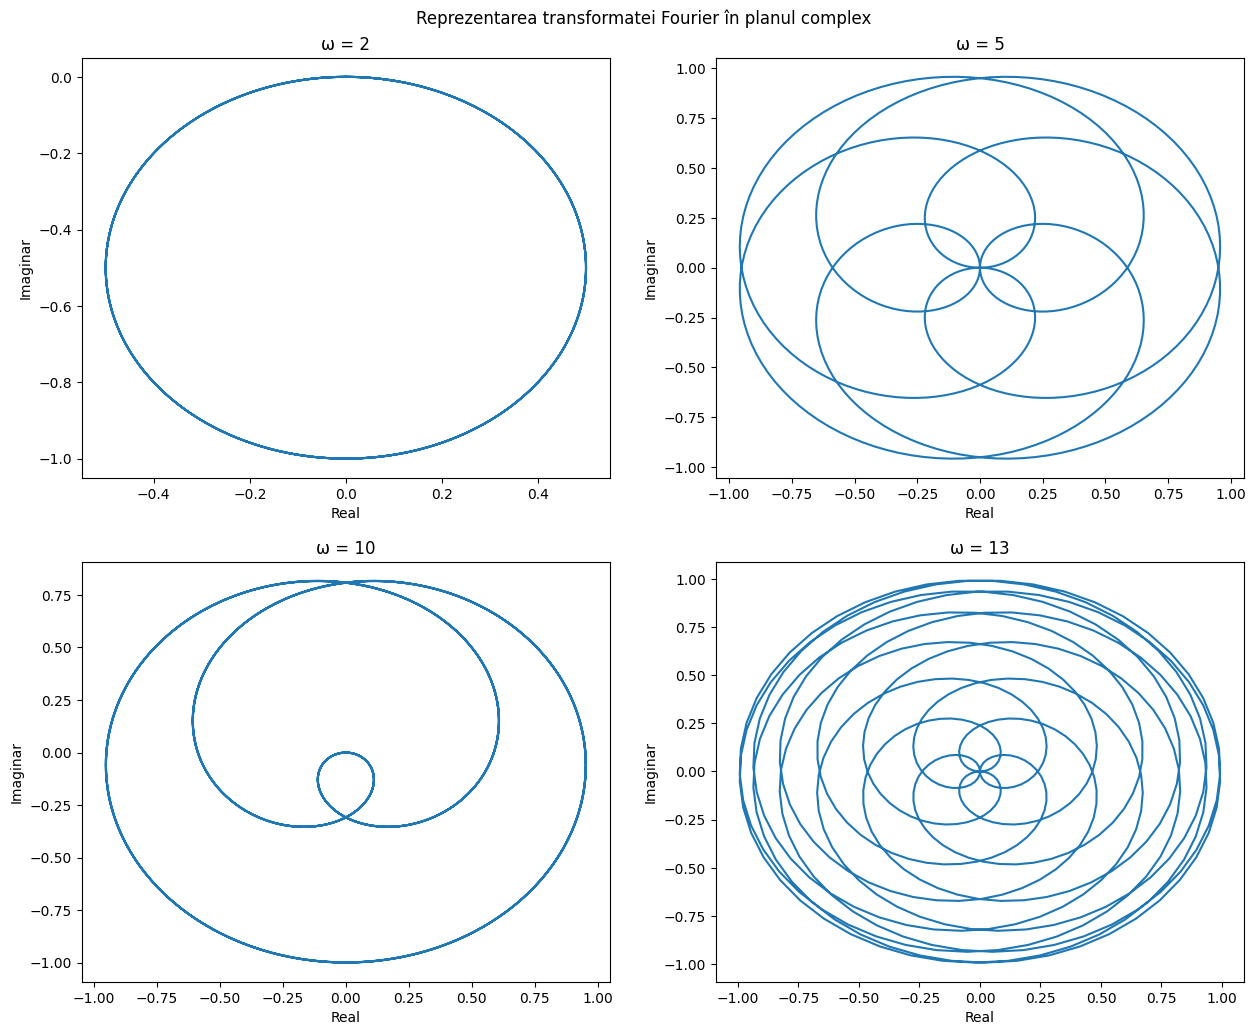

In [16]:
#ex2

t = np.linspace(0, 1, 600)
f = 2
x = np.sin(2 * np.pi * f * t)

n = np.linspace(0, 1, 600)
fourier_representation = x * math.e ** (-2 * np.pi * 1j * n)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Reprezentarea unui semnal în planul complex')
fig.set_size_inches(15, 5)
ax1.plot(t, x)
ax1.set_title('Semnal sinusoidal în timp')
ax1.set_xlabel('Timp (esantioane)')
ax1.set_ylabel('Amplitudine')

ax2.plot(fourier_representation.real, fourier_representation.imag)
ax2.set_title('Reprezentarea în planul complex')
ax2.set_xlabel('Real')
ax2.set_ylabel('Imaginar')

plt.savefig('ex21.png', format='png')
plt.savefig('ex21.pdf', format='pdf')
plt.show()

w = [2, 5, 10, 13]
fourier_results = []

for i in range(len(w)):
    fourier_results.append(x * math.e ** (-2 * np.pi * 1j * n * w[i]))

fig2, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig2.suptitle('Reprezentarea transformatei Fourier în planul complex', y=0.92)
fig2.set_size_inches(15, 12)

ax1.set_title('ω = 2')
ax1.plot(fourier_results[0].real, fourier_results[0].imag)

ax2.set_title('ω = 5')
ax2.plot(fourier_results[1].real, fourier_results[1].imag)

ax3.set_title('ω = 10')
ax3.plot(fourier_results[2].real, fourier_results[2].imag)

ax4.set_title('ω = 13')
ax4.plot(fourier_results[3].real, fourier_results[3].imag)

for ax in (ax1, ax2, ax3, ax4):
    ax.set_xlabel('Real')
    ax.set_ylabel('Imaginar')

plt.savefig('ex22.png', format='png')
plt.savefig('ex22.pdf', format='pdf')
plt.show()

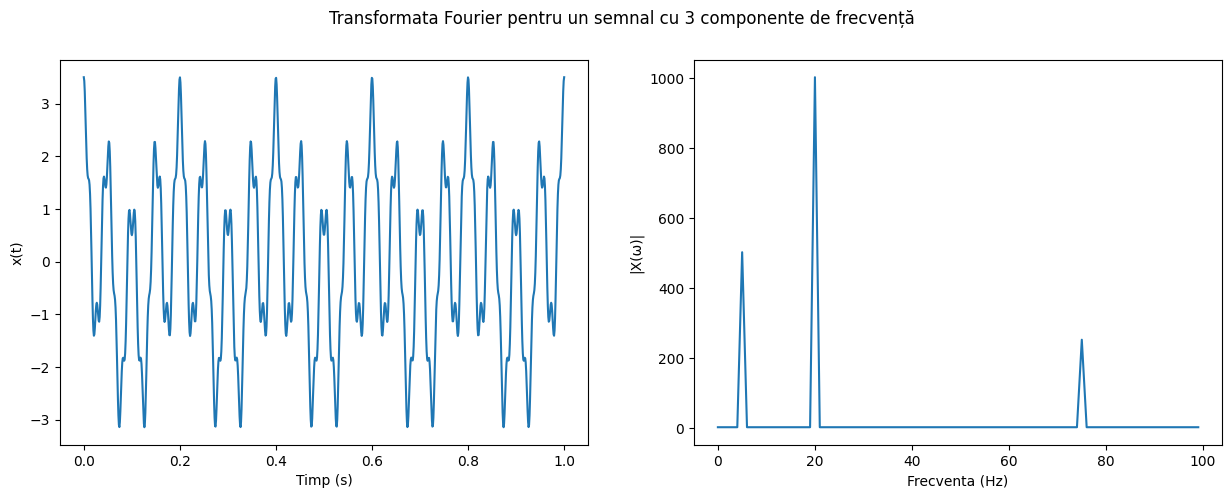

In [17]:
#ex3

def fourier(t, w=1):
    return math.e ** (-2 * np.pi * 1j * t * w) 

t= np.linspace(0, 1, 1000)

f1 = 5
f2 = 20
f3 = 75

samples = np.cos(2 * np.pi * f1 * t) + 2 * np.cos(2 * np.pi * f2 * t) + 0.5 * np.cos(2 * np.pi * f3 * t)
W = 100
ls = np.zeros(W, dtype=np.complex_)

for l in range(W):
    ls[l] = np.sum(fourier(t, l) * samples)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Transformata Fourier pentru un semnal cu 3 componente de frecvență')
fig.set_size_inches(15, 5)
ax1.set_xlabel("Timp (s)")
ax1.set_ylabel("x(t)")
ax1.plot(t, samples)
ax2.set_xlabel("Frecventa (Hz)")    
ax2.set_ylabel("|X(ω)|")
ax2.plot(np.abs(ls))

plt.savefig('ex3.png', format='png')
plt.savefig('ex3.pdf', format='pdf')
plt.show()

Matricea Fourier este unitară: True


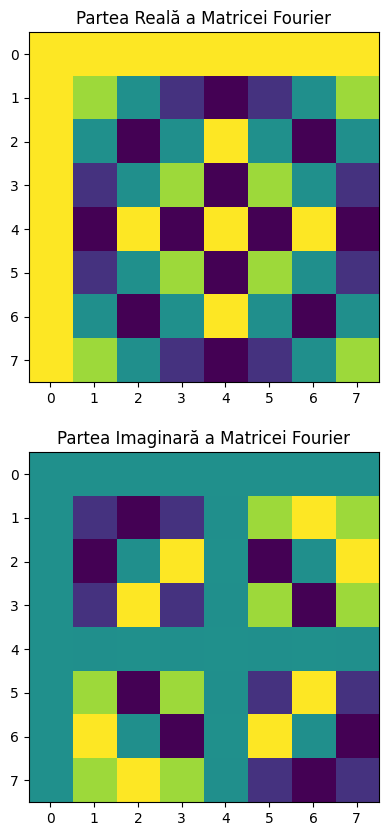

In [19]:
#ex1

def create_fourier_matrix(N):
    F = np.zeros((N, N), dtype=np.complex128)
    for j in range(N):
        for k in range(N):
            F[j, k] = np.exp(-2j * np.pi * j * k / N) / np.sqrt(N)
    return F


def check_unitarity(F):
    identity_matrix = np.eye(F.shape[0])
    product = np.dot(F.conjugate().T, F)

    return np.allclose(product, identity_matrix)


N = 8
F = create_fourier_matrix(N)

print("Matricea Fourier este unitară:", check_unitarity(F))

fig, axs = plt.subplots(2, 1, figsize=(20, 10))

axs[0].imshow(np.real(F))
axs[0].set_title('Partea Reală a Matricei Fourier')

axs[1].imshow(np.imag(F))
axs[1].set_title('Partea Imaginară a Matricei Fourier')

plt.savefig('ex1.png', format='png')
plt.savefig('ex1.pdf', format='pdf')
plt.show()